In [4]:
import pandas as pd
from IPython.display import display, HTML

df = pd.read_csv("C:/Users/Saisa/Downloads/Walmart_Sales/data/Processed/feature_engineered_sales.csv", parse_dates=["date"])



In [5]:
# Display dataframe info as a nicely formatted HTML table
info_df = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": [df[col].notnull().sum() for col in df.columns],
    "Dtype": [df[col].dtype for col in df.columns]
})
display(HTML("<h3>Dataset Info</h3>"))
display(info_df)



,Column,Non-Null Count,Dtype
0,store,2565,int64
1,date,2565,datetime64[ns]
2,weekly_sales,2565,float64
3,holiday_flag,2565,int64
4,temperature,2565,float64
5,fuel_price,2565,float64
6,cpi,2565,float64
7,unemployment,2565,float64
8,year,2565,int64
9,month,2565,int64


In [6]:
# Display the first 5 rows in tabular format
display(HTML("<h3>First 5 Rows</h3>"))
display(df.head())

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,...,sales_roll_13,sales_roll_26,sales_roll_52,cumulative_sales,sales_diff_1,sales_diff_4,avg_sales_per_store,promo_last_week,promo_next_week,store_encoded
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,...,0.0,0.0,0.0,1643690.90,0.00,0.00,1.601845e+06,0.0,0.0,0
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,...,0.0,0.0,0.0,3285648.34,-1733.46,0.00,1.601845e+06,0.0,0.0,0
2,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,...,0.0,0.0,0.0,4840455.02,-87150.76,0.00,1.601845e+06,0.0,0.0,0
3,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010,12,...,0.0,0.0,0.0,6279996.61,-115265.09,0.00,1.601845e+06,0.0,0.0,0
4,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,2,...,0.0,0.0,0.0,7874964.89,155426.69,-48722.62,1.601845e+06,0.0,0.0,0


In [8]:
# Summary Statistics

numeric_df = df.select_dtypes(include='number')
summary_stats = numeric_df.describe().T
summary_stats['missing_values'] = df[numeric_df.columns].isnull().sum()
summary_stats['%_missing'] = (summary_stats['missing_values'] / len(df)) * 100

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
summary_stats


,count,mean,std,min,25%,50%,75%,max,missing_values,%_missing
store,2565.00,23.00,12.99,1.00,12.00,23.00,34.00,45.00,0,0.00
weekly_sales,2565.00,1059871.95,557383.10,209986.25,570069.48,981345.20,1450733.29,2752122.08,0,0.00
holiday_flag,2565.00,0.11,0.31,0.00,0.00,0.00,0.00,1.00,0,0.00
temperature,2565.00,59.59,19.07,-2.06,45.26,61.10,74.57,100.07,0,0.00
fuel_price,2565.00,3.33,0.46,2.51,2.87,3.42,3.70,4.47,0,0.00
cpi,2565.00,171.39,39.29,126.09,131.59,182.60,212.51,227.17,0,0.00
unemployment,2565.00,8.02,1.88,3.88,6.91,7.91,8.62,14.31,0,0.00
year,2565.00,2010.93,0.79,2010.00,2010.00,2011.00,2012.00,2012.00,0,0.00
month,2565.00,6.56,3.46,1.00,4.00,6.00,10.00,12.00,0,0.00
day,2565.00,6.49,3.26,1.00,4.00,6.00,9.00,12.00,0,0.00


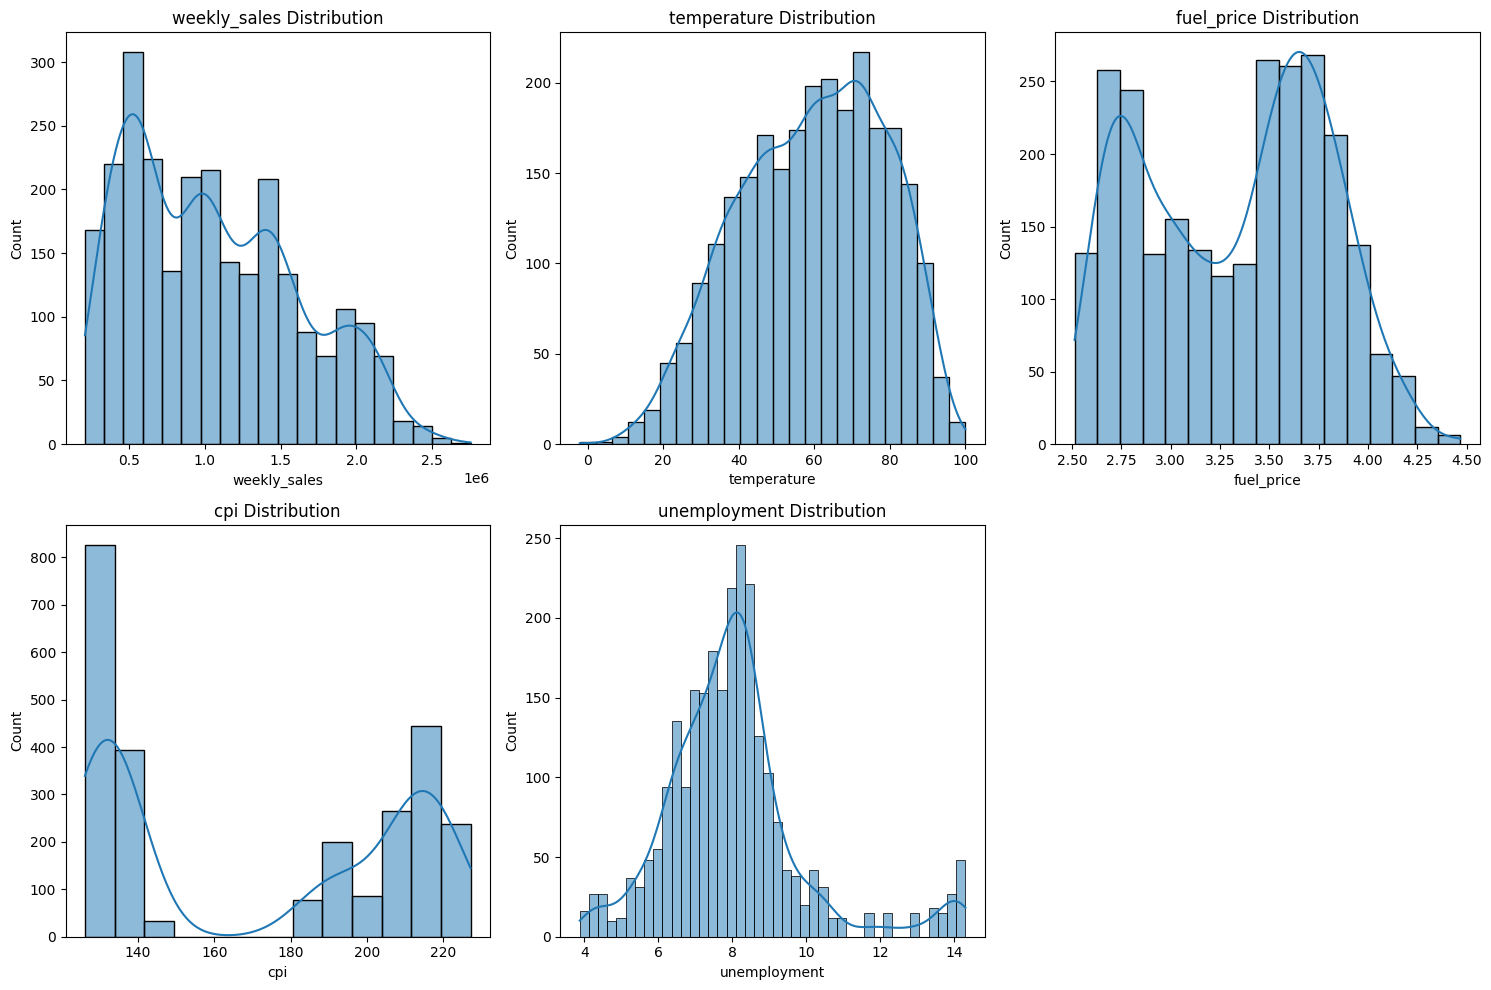

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


In [11]:
from scipy.stats import zscore
import pandas as pd

# List of numerical columns to check
num_cols = df.select_dtypes(include='number').columns.tolist()

# Create a list to collect results
outlier_data = []

# Loop through numeric columns and compute z-score
for col in num_cols:
    df[f'z_{col}'] = zscore(df[col])
    count = (df[f'z_{col}'].abs() > 3).sum()
    outlier_data.append({"feature": col, "count_outliers": count})

# Convert list to DataFrame
outlier_summary = pd.DataFrame(outlier_data)

# Sort and view
outlier_summary = outlier_summary.sort_values(by="count_outliers", ascending=False)
outlier_summary


,feature,count_outliers
11,is_holiday,180
26,promo_last_week,180
27,promo_next_week,180
17,lag_52,92
21,sales_roll_52,90
6,unemployment,90
23,sales_diff_1,56
24,sales_diff_4,50
22,cumulative_sales,30
16,lag_26,3


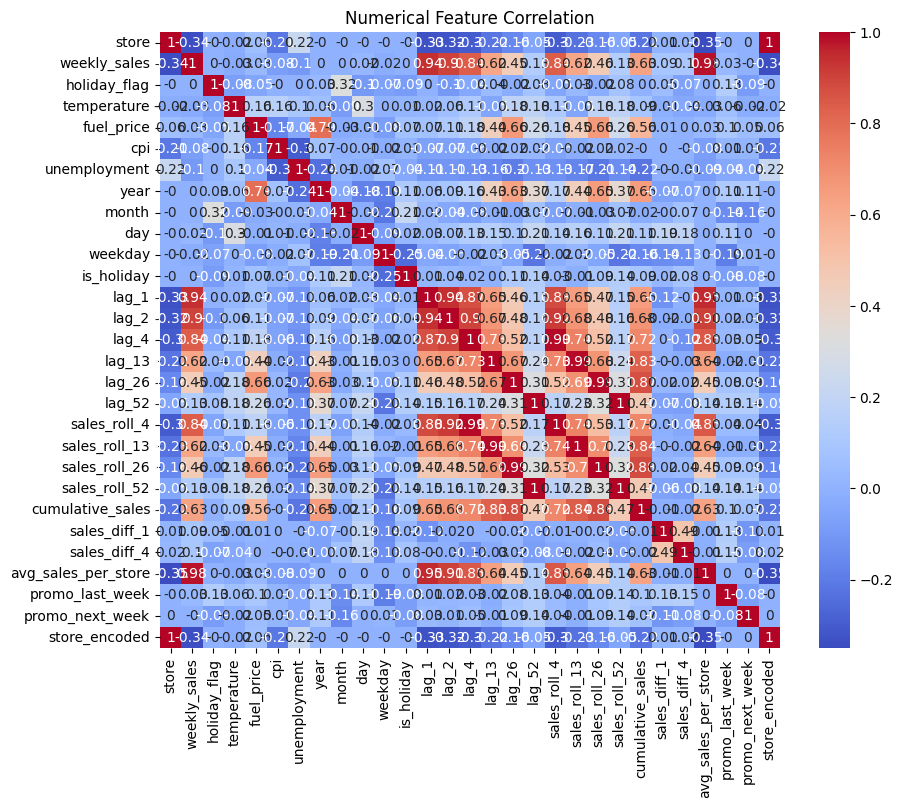

In [12]:
corr_matrix = numeric_df.corr().round(2)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Numerical Feature Correlation")
plt.show()


In [13]:
corr_target = df[num_cols].corr()['weekly_sales'].sort_values(ascending=False)
corr_target


weekly_sales           1.00
z_weekly_sales         1.00
avg_sales_per_store    0.98
lag_1                  0.94
lag_2                  0.90
sales_roll_4           0.84
lag_4                  0.84
cumulative_sales       0.63
sales_roll_13          0.62
lag_13                 0.62
sales_roll_26          0.46
lag_26                 0.45
sales_roll_52          0.13
lag_52                 0.13
sales_diff_4           0.10
sales_diff_1           0.09
promo_last_week        0.03
fuel_price             0.03
day                    0.02
month                  0.00
is_holiday             0.00
year                   0.00
holiday_flag           0.00
promo_next_week       -0.00
weekday               -0.02
temperature           -0.03
cpi                   -0.08
unemployment          -0.10
store                 -0.34
store_encoded         -0.34
Name: weekly_sales, dtype: float64

In [14]:
from scipy.stats import skew, kurtosis

skew_kurt = pd.DataFrame(index=num_cols)
skew_kurt['Skewness'] = df[num_cols].apply(skew)
skew_kurt['Kurtosis'] = df[num_cols].apply(kurtosis)

skew_kurt.sort_values(by='Skewness', key=abs, ascending=False)


,Skewness,Kurtosis
lag_52,4.17,17.85
sales_roll_52,4.07,16.60
promo_next_week,3.37,9.33
promo_last_week,3.37,9.33
is_holiday,3.37,9.33
holiday_flag,2.57,4.62
sales_diff_1,-1.37,10.00
unemployment,1.20,2.66
cumulative_sales,1.15,0.86
lag_26,0.89,-0.35


In [15]:
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week

monthly_summary = df.groupby('month')['weekly_sales'].agg(['mean', 'std', 'max', 'min']).reset_index()
weekly_summary = df.groupby('week')['weekly_sales'].agg(['mean', 'std', 'max', 'min']).reset_index()

monthly_summary


,month,mean,std,max,min
0,1,1008661.31,524742.99,2179360.94,224294.39
1,2,1070975.69,566532.52,2495630.51,220060.35
2,3,1064207.94,557316.64,2416051.17,209986.25
3,4,1062675.56,561344.78,2363601.47,234218.03
4,5,1057716.88,561696.70,2623469.95,242456.39
5,6,1087900.96,568507.34,2565259.92,257031.19
6,7,1037893.22,539986.60,2370116.52,243948.82
7,8,1047227.09,542878.33,2245257.18,262717.71
8,9,1089198.44,579856.19,2546123.78,257361.30
9,10,1095038.94,586527.03,2752122.08,253050.10


In [20]:
store_summary = df.groupby('store_name')['weekly_sales'].agg(['mean', 'std', 'max', 'min']).sort_values(by='mean', ascending=False)

store_summary.head()


,mean,std,max,min
store_name,,,,
Detroit West,2169370.45,167719.24,2752122.08,1843030.95
Las Vegas Metro,2088557.17,153324.59,2508955.24,1812208.22
Charlotte South,2075189.47,224425.65,2623469.95,1639585.61
Columbus Uptown,1998168.43,139551.51,2462779.06,1744544.39
New York Industrial,1951954.53,122384.04,2378726.55,1748000.65


In [21]:
import plotly.express as px

fig = px.line(df, x='date', y='weekly_sales', title='Weekly Sales Over Time')
fig.show()


In [22]:
df['rolling_4_week_sales'] = df['weekly_sales'].rolling(window=4).mean()

fig = px.line(df, x='date', y='rolling_4_week_sales', title='4-Week Rolling Average Sales')
fig.show()


In [23]:
store_sales = df.groupby('store_name')['weekly_sales'].sum().reset_index()

fig = px.bar(store_sales.sort_values('weekly_sales', ascending=False),
             x='store_name', y='weekly_sales', title='Total Sales by Store')
fig.show()


In [24]:
df['month'] = df['date'].dt.month
monthly_sales = df.groupby('month')['weekly_sales'].sum().reset_index()

fig = px.bar(monthly_sales, x='month', y='weekly_sales', title='Monthly Sales Trend')
fig.show()


In [25]:
fig = px.box(df, x='is_holiday', y='weekly_sales', 
             title='Sales Distribution: Holiday vs Non-Holiday',
             labels={'is_holiday': 'Holiday Week'})
fig.show()


In [26]:
fig = px.scatter(df, x='temperature', y='weekly_sales', 
                 trendline='ols', title='Sales vs Temperature')
fig.show()

fig = px.scatter(df, x='fuel_price', y='weekly_sales', 
                 trendline='ols', title='Sales vs Fuel Price')
fig.show()


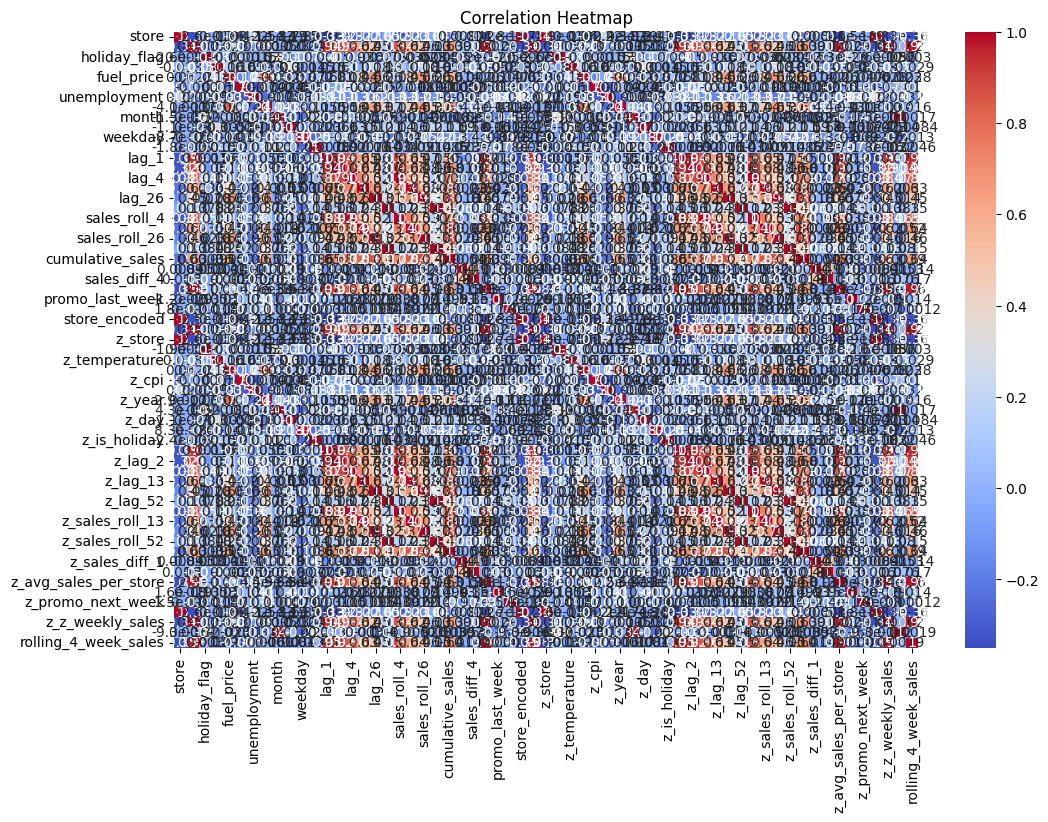

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

numerics = df.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numerics.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [29]:
import plotly.figure_factory as ff

corr_matrix = numerics.corr().round(2)
fig = ff.create_annotated_heatmap(z=corr_matrix.values,
                                  x=list(corr_matrix.columns),
                                  y=list(corr_matrix.columns),
                                  annotation_text=corr_matrix.values.astype(str),
                                  colorscale='Viridis')
fig.update_layout(title="Interactive Correlation Heatmap")
fig.show()


In [30]:
from scipy.stats import zscore

df['z_score'] = zscore(df['weekly_sales'])
outliers = df[df['z_score'].abs() > 3]

fig = px.scatter(df, x='date', y='weekly_sales', color=(df['z_score'].abs() > 3),
                 title='Sales with Outliers Highlighted')
fig.show()


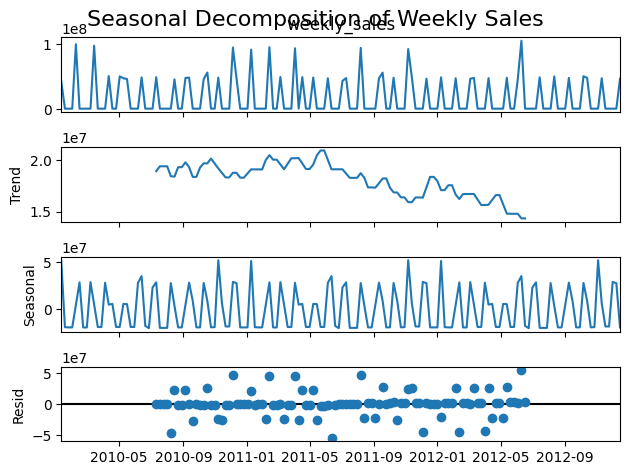

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_ts = df.set_index('date').resample('W').sum()['weekly_sales']
result = seasonal_decompose(df_ts, model='additive', period=52)

result.plot()
plt.suptitle("Seasonal Decomposition of Weekly Sales", fontsize=16)
plt.show()
